# Sphere Seeding Test Visualization

This notebook visualizes the blob distribution and first simulation frame for sphere seeding tests.

In [37]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the sphere seeding test simulation
# Adjust the date and path according to your actual simulation
sphere_test_path = '../data/ablation_test_3/20251010/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'

# Parameters (adjust these to match your simulation)
filament_length = 49.4
num_steps = 500
sphere_radius = 197.6
num_segs = 20

In [38]:
# Load the simulation data
print("Loading simulation data...")
sim = load_simulation(sphere_test_path, num_steps=num_steps, sphere_radius=sphere_radius, num_segs=num_segs)
print(f"✅ Loaded: {sim.phases.shape[0]} timesteps, {sim.phases.shape[1]} filaments")

Loading simulation data...
[info] Using num_steps=500 for time normalization.
✅ Loaded: 9 timesteps, 270 filaments


## Blob Distribution Visualization

Visualize the surface blob positions in different views and color schemes.

Creating top-down blob visualization (colored by azimuth)...


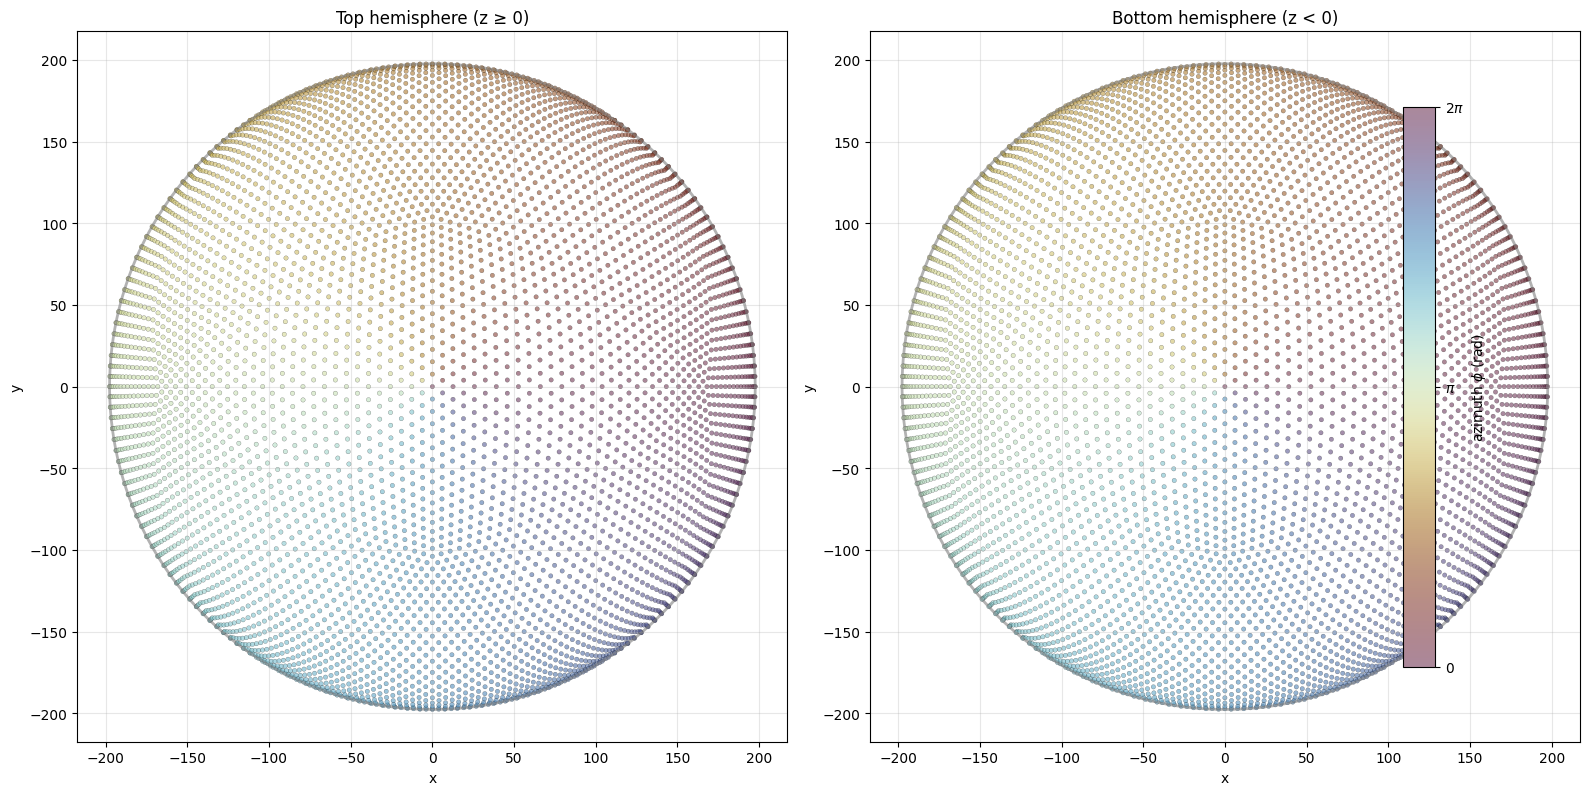

[info] Saved blob positions to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_top_azimuth_split.png


In [39]:
# Top-down view colored by azimuth
print("Creating top-down blob visualization (colored by azimuth)...")
fig1, ax1 = plot_blob_positions(
    sphere_test_path, 
    sim=sim, 
    view="top", 
    color_by="azimuth",
    show=True,
    save=True,
    split_hemispheres=True
)
plt.close(fig1)

Creating 3D blob visualization (colored by altitude)...


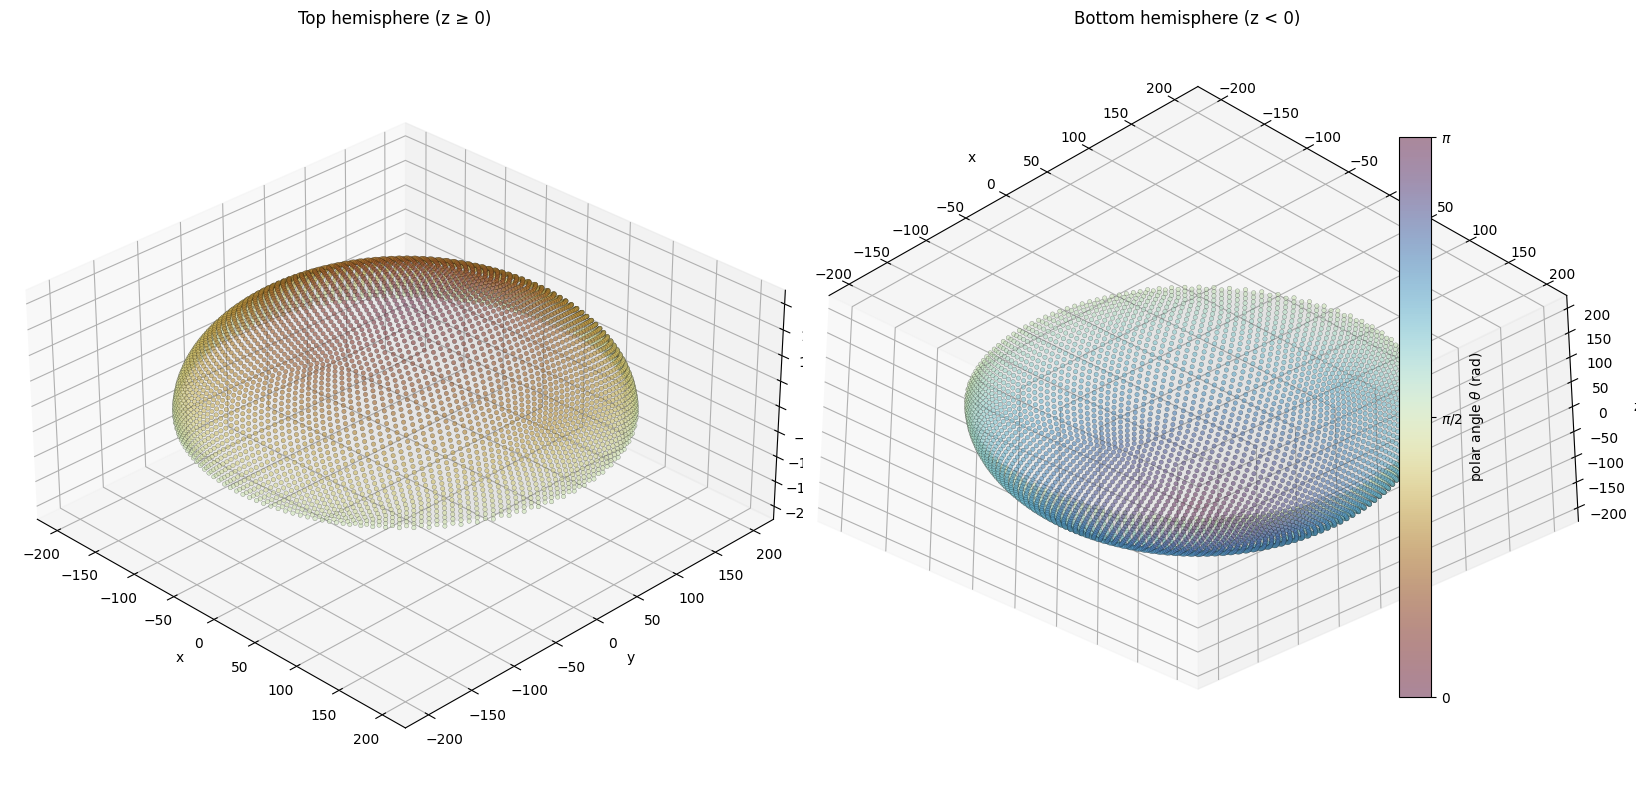

[info] Saved blob positions to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_altitude_split.png


In [40]:
# 3D isometric view colored by altitude
print("Creating 3D blob visualization (colored by altitude)...")
fig2, ax2 = plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="iso",
    color_by="altitude",
    show=True,
    save=True
)
plt.close(fig2)

Creating 3D blob visualization (colored by index)...


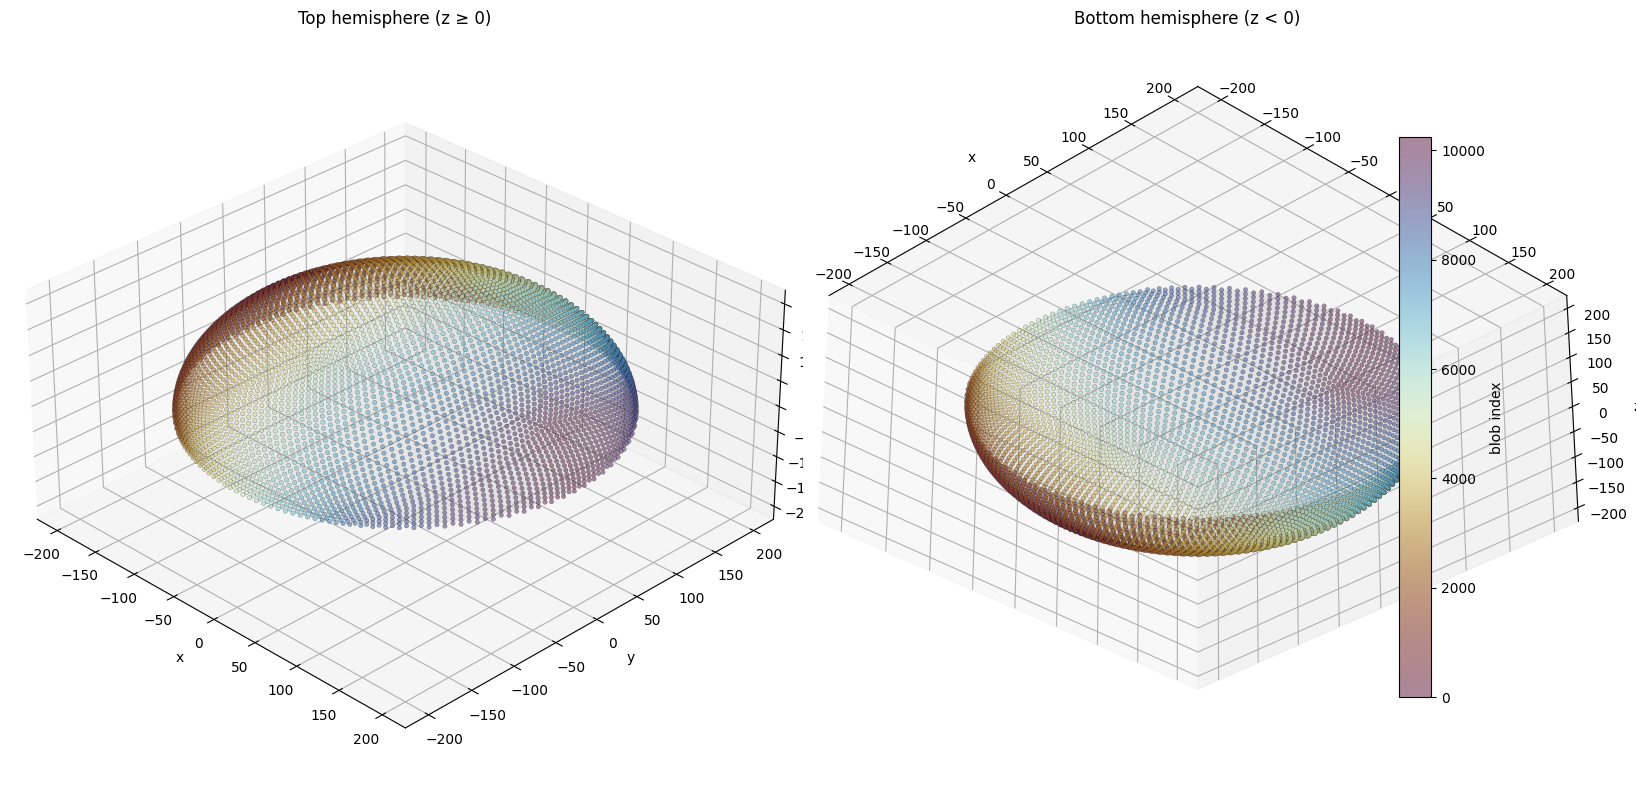

[info] Saved blob positions to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_sphere_index_split.png


In [41]:
# 3D sphere view colored by index (to see blob numbering)
print("Creating 3D blob visualization (colored by index)...")
fig3, ax3 = plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="sphere",
    color_by="index",
    show=True,
    save=True
)
plt.close(fig3)

## Filament Positions

Visualize the basal (attachment) positions of the cilia.

Creating basal position visualization...


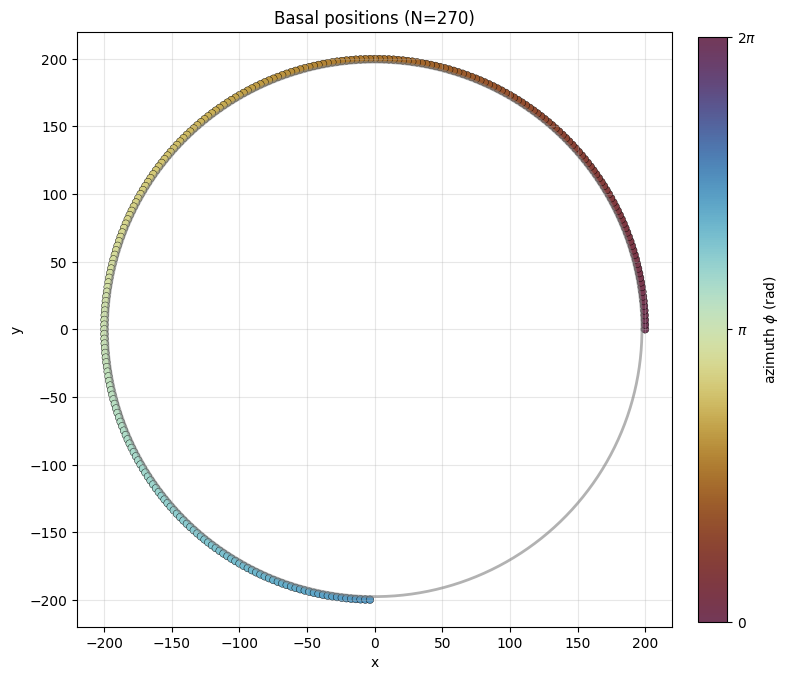

[info] Saved basal positions to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png


In [42]:
# Plot basal positions
print("Creating basal position visualization...")
fig4, ax4 = plot_basal_positions(
    sphere_test_path,
    sim=sim,
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig4)

## First Simulation Frame

Visualize the first frame of the simulation showing both cilia and the sphere.

Creating first frame visualization (top view)...


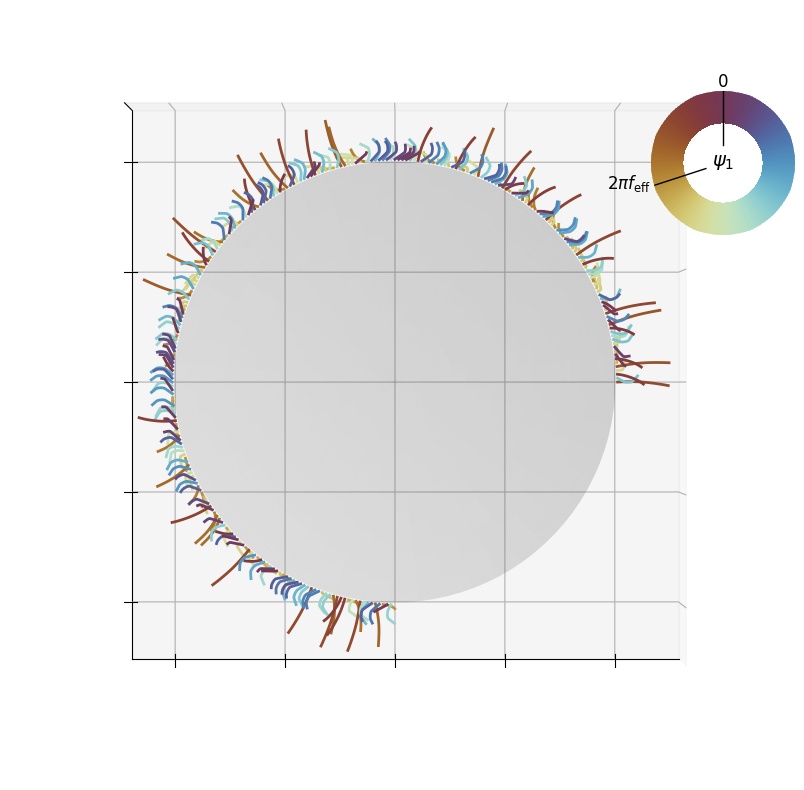

[info] Saved frame to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_0_top.png


In [43]:
# Top-down view of first frame
print("Creating first frame visualization (top view)...")
fig5, ax5 = plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,  # First frame
    view="top",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig5)

Creating first frame visualization (isometric view)...


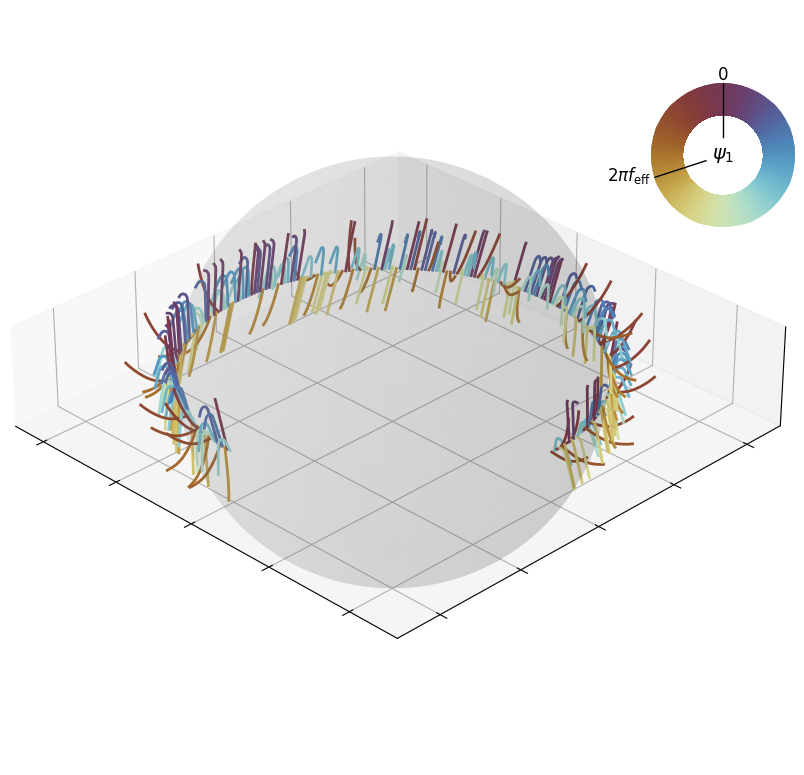

[info] Saved frame to analysis_output/ciliate_270fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_0_iso.png


In [44]:
# Isometric view of first frame
print("Creating first frame visualization (isometric view)...")
fig6, ax6 = plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,  # First frame
    view="iso",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig6)

## Combined Visualization

Create a figure showing both blobs and cilia together.

/tmp/ipykernel_3263515/979346768.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


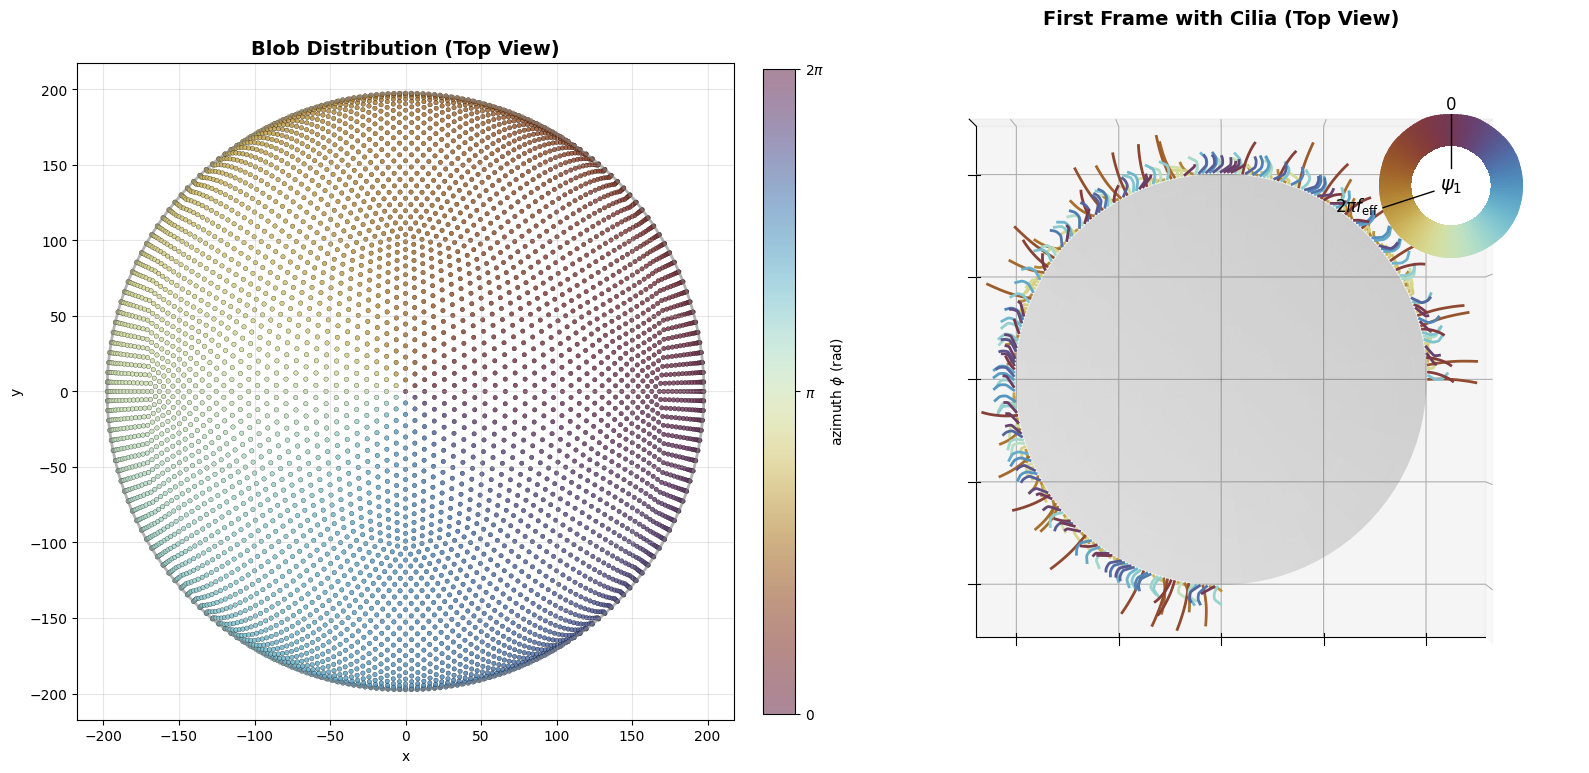

✅ Combined visualization saved!


In [45]:
# Create a combined figure with blobs and first frame
fig = plt.figure(figsize=(16, 8))

# Left panel: blob distribution (top view)
ax_left = fig.add_subplot(121)
plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="top",
    color_by="azimuth",
    show=False,
    save=False,
    fig_ax=(fig, ax_left)
)
ax_left.set_title("Blob Distribution (Top View)", fontsize=14, fontweight='bold')

# Right panel: first frame with cilia
ax_right = fig.add_subplot(122, projection='3d')
plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,
    view="top",
    color_by_phase=True,
    show=False,
    save=False,
    fig_ax=(fig, ax_right)
)
ax_right.set_title("First Frame with Cilia (Top View)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_output/sphere_seeding_test_combined.png', dpi=180, bbox_inches='tight')
plt.show()
print("✅ Combined visualization saved!")